![](kh1.png)

## in this project 
I will analyze data for a set of movie lists and deduce through some statistical process some useful theories related to filmmaking.In the beginning: I will need a set of useful libraries to retrieve and then process and analyze data to reach a set of results based on a correct basis in the analysis process.
The most important of these libraries:"numpy,pandas, seaborn, and mutlalb"، Shall we ? -

## From this basis:

I will pose a set of questions that help organize theories of data analysis

1- What are the top ten films according to the revenue list?

2- What are the top ten films based on voting?

3- What were the most popularity films during that period 1960-2015 ?!

4- What are the 10 films that have suffered losses throughout history?

5-An analysis of the top five directors movies :( christopher_nolan vs james_cameron )

6- For every dollar spent in the budget, how many profits did he make for directors:
  ( christopher_nolan vs james_cameron )?

7- What is the most productive film company?

8- What is the total revenue, profit and budget of the most powerful company in the film industry?

9- How many characters have been performed from 1960-2015 ?

10-Who were the 10 actors that earned the most roles?

11- How many movies were made and produced under each genre ?

12- In the years of the new millennium, what is the role of comedy in filmmaking?

## The data will go through three basic stages:

1) Read it and explore the gaps

2) Data cleaning and processing

3) Adding the necessary data to analyze the data and conduct the census



## First Step, Read the data in Python :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =pd.read_csv("tmdb_movies.csv")
data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


## Second Step:

Start preparing the data to be processed with the following,
I review columns to determine what is necessary and useful and what is not important in data analysis
Also look for the missing values

In [3]:
data.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### From the data above I noticed that in this project I don't need each of the following columns:id ،homepage ، tagline، keywords،overview،imdb_id،release_date،revenue_adj ، budget_adj , Also there is some lost data, so the data will now be cleaned and processed


In [5]:

data_movies=data.drop(['id', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id','release_date','revenue_adj','budget_adj'], axis=1)
data_movies[['production_companies','director','cast','genres']].replace(0,np.NAN)
data_movies.dropna(subset=['production_companies','director','cast','genres'], inplace=True)
data_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


## The third step: 
We start adding some very important columns in data analysis. In fact, I need two new columns, 

which are "profit" and "ratio "

We start first with profits: How profits are generally calculated in statistics.
profit=(revenue - budget)
We apply the Python revenue calculation method and then insert the column into the main table

In [6]:
profit=(data_movies.revenue - data_movies.budget)
profit=pd.DataFrame(profit)
profit.columns=['profit']
data_movies['profit']=profit

ratio=(data_movies.revenue / data_movies.budget)*100
ratio=pd.DataFrame(ratio)
ratio.columns=['ratio'] 
data_movies['ratio']=ratio

data_movies.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,ratio
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,1009.019207
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354,252.290903
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201,268.398365





### ـ   Let's start now with the best three stories:
the beautiful thing about statistics is that the stories are variable, meaning that every time you change the search filter, a different story will appear to us from the previous one.




![](kh2.jpg)


Now with the important question:
### 1- What are the top ten films according to the revenue list?

In [8]:
top_ten=data_movies.sort_values('revenue',ascending=False).head(10)
top_ten

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit,ratio
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009,2544505847,1173.631159
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225,1034.089113
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997,1645034188,922.517094
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,Marvel Studios,8903,7.3,2012,1299557910,690.708141
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810,1009.019207
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360,792.762821
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015,1125035767,501.798488
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,3750,7.7,2011,1202817822,1062.254258
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3369,7.5,2013,1124219009,849.479339
5425,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,Marvel Studios,6882,6.9,2013,1015439994,607.719997


/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/losh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/losh/opt/anaconda3/lib/pytho

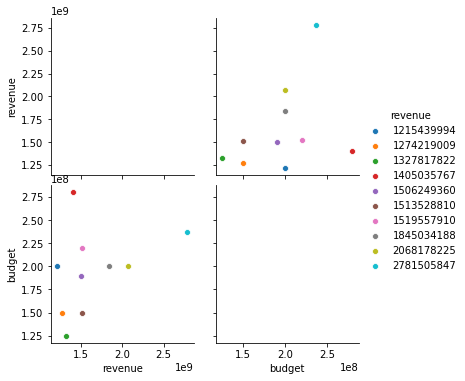

In [12]:
sns.pairplot(top_ten, hue='revenue',vars=['revenue','budget']);

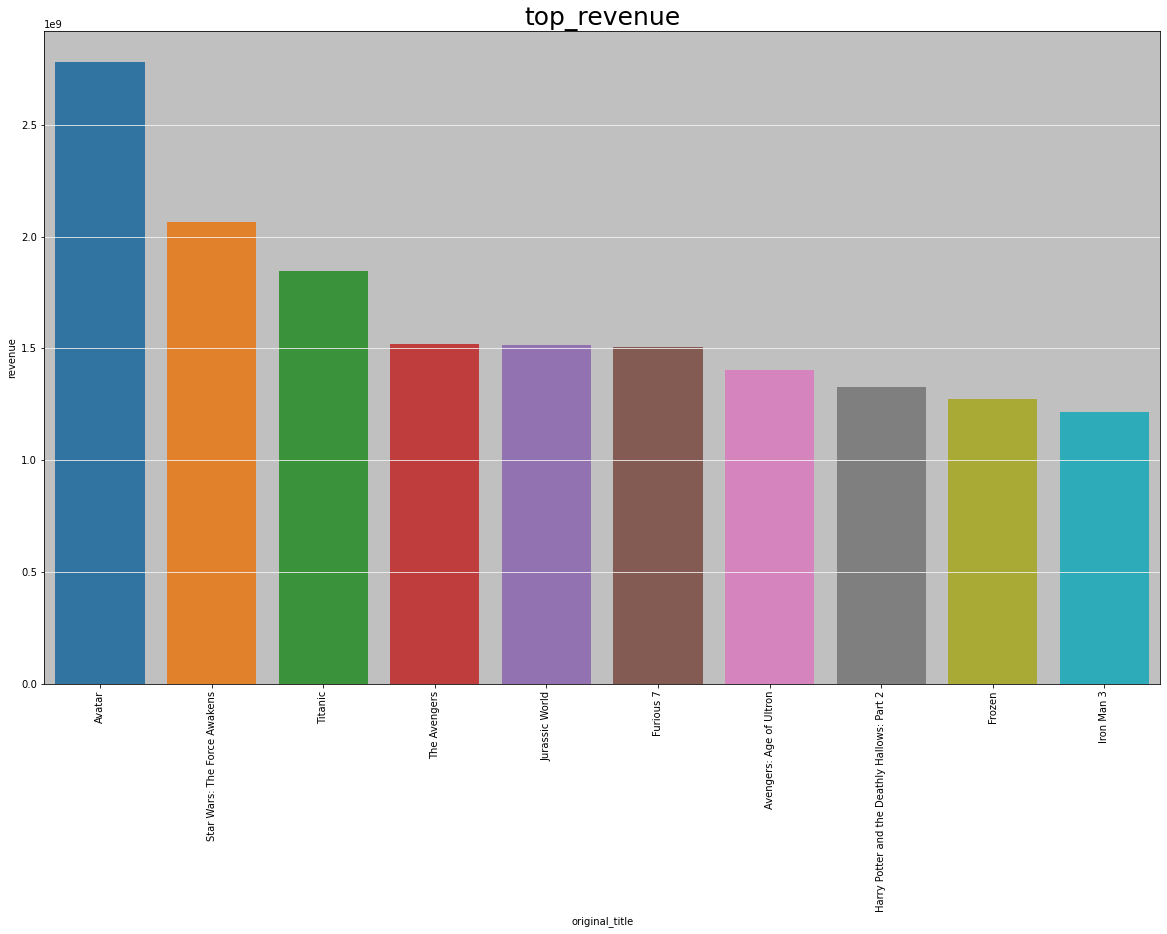

In [8]:
plt.figure(figsize = (20,12));
plt.gca().set_facecolor('silver')
sns.barplot(x = top_ten['original_title'],y = top_ten['revenue'] );
plt.xticks(rotation = 90);
plt.grid(color='whitesmoke',linestyle='-',axis='y')
plt.title("top_revenue", fontsize = 25 );

### reasoning for visualisations :
The graph shows a preference for the 10 movies based on revenue. Notably, Avatar has crossed the highest revenue ceiling of 2781505847

Now we will read another story related to movie ratings
## 2- What are the top ten films based on voting?

In [9]:

vote_count=data_movies[['original_title','vote_count']]
vote_count.sort_values('vote_count',ascending=False).head(10)



,original_title,vote_count
1919,Inception,9767
4361,The Avengers,8903
1386,Avatar,8458
2875,The Dark Knight,8432
4364,Django Unchained,7375
4382,The Hunger Games,7080
5425,Iron Man 3,6882
4363,The Dark Knight Rises,6723
629,Interstellar,6498
4367,The Hobbit: An Unexpected Journey,6417


# Third story:

The answer is through a graph that shows the most popularity films
## 3- What were the most popularity films during that period 1960-2015 ?!

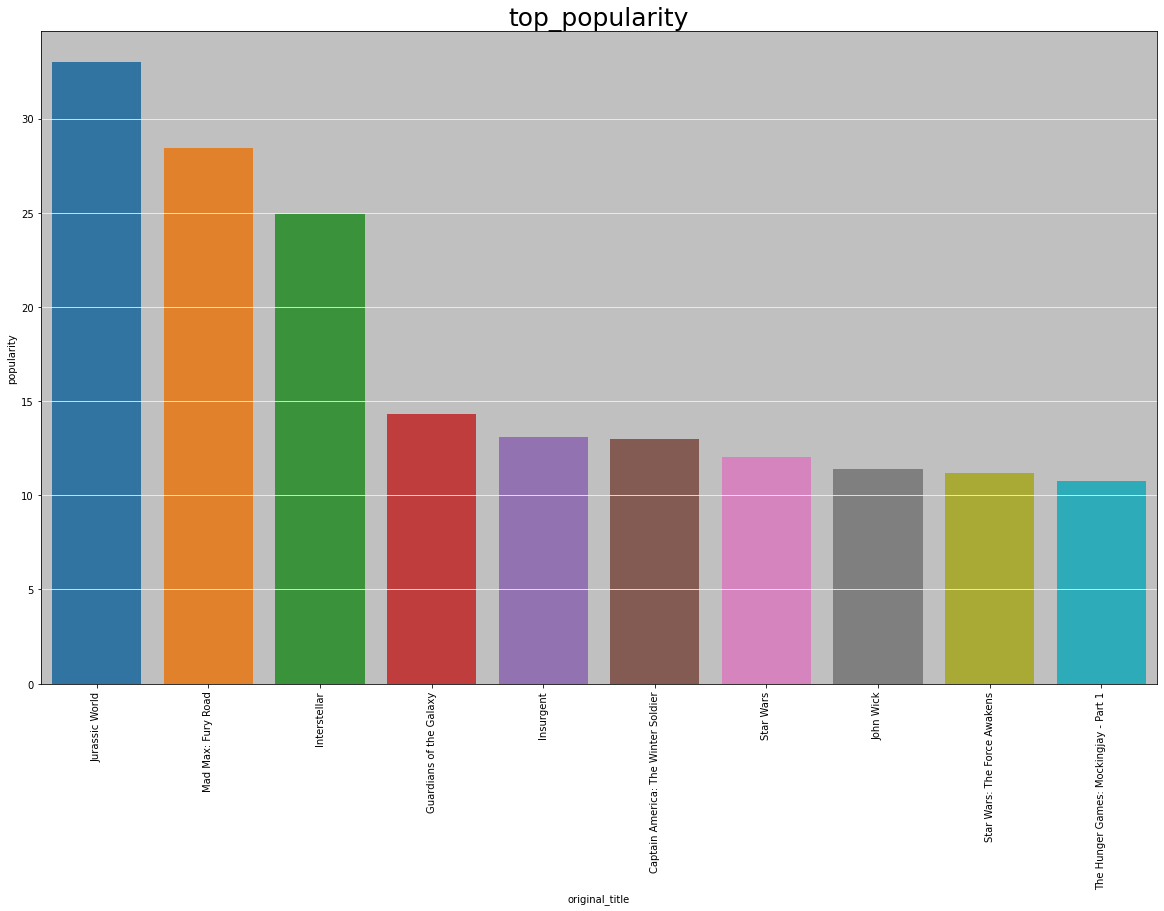

In [10]:
top_popularity=data_movies[['release_year','original_title','popularity']]
top_popularity=top_popularity.sort_values('popularity',ascending=False).head(10)


plt.figure(figsize = (20,12));
plt.gca().set_facecolor('silver')
sns.barplot(x = top_popularity['original_title'],y = top_popularity['popularity'] );
plt.xticks(rotation = 90);
plt.grid(color='whitesmoke',linestyle='-',axis='y')
plt.title("top_popularity", fontsize = 25 );

### reasoning for visualisations:
If we rate the movies based on their popularity, the story will change completely, so the graph shows that Jurassic World, with its 'Action | Adventure | Science Fiction | Thriller' rating, is one of the ten most popular movies among the audience even though the revenue is lower than Avatar. Symbolism. Jurassic World ranks 5th in "Best Revenue" ranking with revenues of 1513528810


### *In short:
Jurassic World it achieved 1st place in popularity and 5th place in financial revenue




...........




### Now with the sad question:

## 4- What are the 10 films that have suffered losses throughout history?

In [11]:
less_profit=data_movies[['release_year','original_title','production_companies','budget','revenue','profit']]
less_profit=less_profit.sort_values('profit',ascending=False).tail(10)
less_profit

,release_year,original_title,production_companies,budget,revenue,profit
2435,1999,The 13th Warrior,Touchstone Pictures,160000000,61698899,-98301101
4970,2003,Brother Bear,Walt Disney Pictures|Walt Disney Feature Anima...,100000000,250,-99999750
1696,2009,Dragonball Evolution,Ingenious Film Partners|Twentieth Century Fox ...,100000000,0,-100000000
2190,2010,Double Wedding,Jaffe / Braunstein Enterprise|Lifetime Network,104002432,0,-104002432
3484,2011,Mars Needs Moms,Walt Disney Animation Studios,150000000,38992758,-111007242
7031,2004,The Alamo,Imagine Entertainment|Touchstone Pictures,145000000,25819961,-119180039
2214,2010,The Pacific,Playtone|HBO|DreamWorks Television,120000000,0,-120000000
2069,2010,The Wolfman,Universal Pictures|Stuber Productions|Relativi...,150000000,0,-150000000
5508,2013,The Lone Ranger,Walt Disney Pictures|Jerry Bruckheimer Films|I...,255000000,89289910,-165710090
2244,2010,The Warrior's Way,Boram Entertainment Inc.,425000000,11087569,-413912431


In [12]:
# the 10 films that have suffered losses throughout history:
 
 
#1-  The Warrior's Way      -413912431
#2-  The Lone Ranger        -165710090
#3-  The Wolfman            -150000000
#4-  The Pacific            -120000000
#5-  The Alamo              -119180039
#6-  Mars Needs Moms        -111007242
#7-  Double Wedding         -104002432
#8-  Dragonball Evolution   -100000000
#9-  Brother Bear           -99999750
#10- The 13th Warrio        -98301101


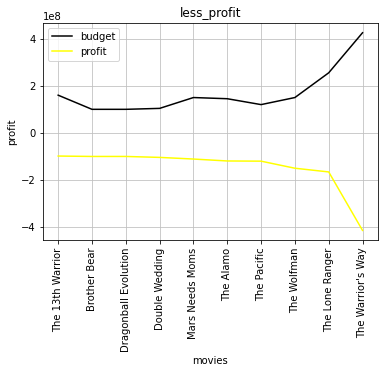

In [13]:
a=less_profit.original_title
b=less_profit.budget
c=less_profit.profit

plt.grid(color='silver',linestyle='-',axis='both')
plt.plot(a,b,'k')
plt.plot(a,c,'yellow')
plt.legend(['budget','profit'])
plt.title('less_profit')
plt.xlabel('movies')
plt.xticks(rotation = 90)
plt.ylabel('profit')
plt.grid(color='silver',linestyle='-',axis='both')
plt.show()

### reasoning for visualisations:¶

- The graph explains the great loss incurred by the ten "most losing" films, as it shows that there is a big gap between the budget and between revenues,

- The lowest losses were for Thirteenth Warrior Values, at a loss of 98,301,101, against a budget of 160,000,000





![](kh4.gif)

## 5-An analysis of the top five directors movies :( christopher_nolan vs james_cameron )

In [14]:
christopher_nolan=data_movies[['original_title','release_year','budget','profit','revenue','ratio']]
christopher_nolan=christopher_nolan[data_movies.director=='Christopher Nolan']
christopher_nolan=christopher_nolan.sort_values('profit',ascending=False)
christopher_nolan.head(5)

,original_title,release_year,budget,profit,revenue,ratio
4363,The Dark Knight Rises,2012,250000000,831041287,1081041287,432.416515
2875,The Dark Knight,2008,185000000,816921825,1001921825,541.579365
1919,Inception,2010,160000000,665500000,825500000,515.937500
629,Interstellar,2014,165000000,456752480,621752480,376.819685
6191,Batman Begins,2005,150000000,224218673,374218673,249.479115


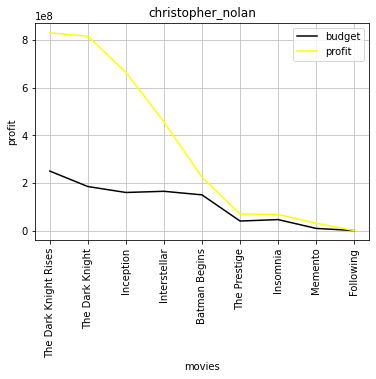

In [15]:
a=christopher_nolan.original_title
b=christopher_nolan.budget
c=christopher_nolan.profit

plt.grid(color='silver',linestyle='-',axis='both')
plt.plot(a,b,'k')
plt.plot(a,c,'yellow')
plt.legend(['budget','profit'])
plt.title('christopher_nolan')
plt.xlabel('movies')
plt.xticks(rotation = 90)
plt.ylabel('profit')
plt.grid(color='silver',linestyle='-',axis='both')
plt.show()

### reasoning for visualisations:

The great director "christopher_nolan" made huge profits through the camera lens for all five of his films, and his lowest profit was "Batman Begins" in which he won "224218673"
He estimated his average earnings for 2010 in "Inception" as his earnings: "665500000" and the budget: "160,000000"
    

In [16]:
james_cameron=data_movies[['original_title','release_year','budget','profit','ratio']]
james_cameron=james_cameron[data_movies.director=='James Cameron']
james_cameron=james_cameron.sort_values('profit',ascending=False)
james_cameron.head(5)

,original_title,release_year,budget,profit,ratio
1386,Avatar,2009,237000000,2544505847,1173.631159
5231,Titanic,1997,200000000,1645034188,922.517094
9317,Terminator 2: Judgment Day,1991,100000000,420000000,520.000000
4186,True Lies,1994,115000000,263882411,329.462966
10472,Aliens,1986,18500000,112560248,708.433773


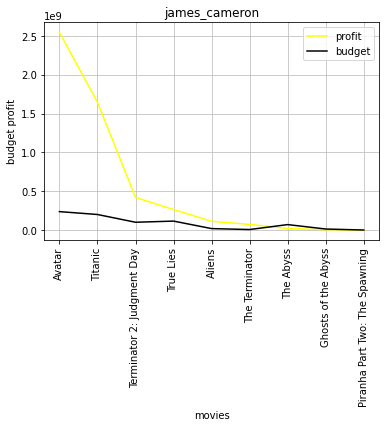

In [17]:

d=james_cameron.original_title
e=james_cameron.profit
f=james_cameron.budget

plt.plot(d,e,'yellow')
plt.plot(d,f,'k')
plt.legend(['profit','budget'])
plt.title('james_cameron')
plt.xlabel('movies')
plt.xticks(rotation = 90)
plt.ylabel('budget profit')
plt.grid(color='silver',linestyle='-',axis='both')
plt.show()

### reasoning for visualisations:

The great director "james_cameron" made huge profits through the camera lens for all five of his films, in "Titanic", the profits were "1645034188".

He estimated his average earnings for 2010 in "Terminator 2: Judgment Day" as his earnings: "420000000" and the budget: "100000000"

## 6- For every dollar spent in the budget, how many profits did he make for directors:
   ## ( christopher_nolan vs james_cameron )?

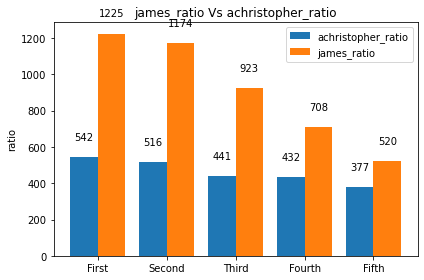

In [18]:

a = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
achristopher_ratio = [ 542 , 516 , 441, 432 ,377 ]
james_ratio=[ 1225 ,1174, 923, 708,  520]

x = np.arange(len(a))  
width = 0.40

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, achristopher_ratio, width, label='achristopher_ratio')
rects2 = ax.bar(x + width/2, james_ratio, width, label='james_ratio')


ax.set_ylabel('ratio')
ax.set_title('james_ratio Vs achristopher_ratio')
ax.set_xticks(x)
ax.set_xticklabels(a)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,15), 
                    textcoords="offset points",
                    ha='center', va='bottom')



autolabel(rects1)
autolabel(rects2) 
fig.tight_layout()
fontsize = 40
plt.show()

### reasoning for visualisations:

- * The graph shows how much for every dollar spent how many times the profit was made by the five best films by directors
- For example, Director Christopher_nolan, on Terminator 2: Judgment Day, 1991, for every dollar spent in the budget, 441 earnings are recorded for every dollar, which is a brilliant thing. 

### *Notice :
All of the directors are great and have made huge profits in the movie industry, and they have their own magic touch,



## 7- What is the most productive film company?

In [19]:
moveis_production_co=data_movies
all_production_co = moveis_production_co.copy()
the_production_companies = all_production_co['production_companies'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
the_production_companies.name = 'the_production_companies'
all_production_co = all_production_co.join(the_production_companies)
all_production_co=all_production_co[['original_title','release_year','budget','profit','popularity','revenue','the_production_companies']]
all_production_co['the_production_companies'].value_counts()


Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
                                         ... 
Exxodus Pictures                            1
Montauk Productions                         1
Tobis                                       1
Larger Than Life Productions                1
Front Films                                 1
Name: the_production_companies, Length: 7842, dtype: int64

In [20]:
Universal_Pictures=all_production_co[all_production_co.the_production_companies=='Universal Pictures']
Universal_Pictures=Universal_Pictures.sort_values('profit',ascending=False)
Universal_Pictures.head(10)

,original_title,release_year,budget,profit,popularity,revenue,the_production_companies
4,Furious 7,2015,190000000,1316249360,9.335014,1506249360,Universal Pictures
8,Minions,2015,74000000,1082730962,7.404165,1156730962,Universal Pictures
5434,Despicable Me 2,2013,76000000,894761885,3.928789,970761885,Universal Pictures
10223,Jurassic Park,1993,63000000,857100000,2.204926,920100000,Universal Pictures
8889,E.T. the Extra-Terrestrial,1982,10500000,782410554,2.900556,792910554,Universal Pictures
5650,Fast & Furious 6,2013,160000000,628679850,0.522347,788679850,Universal Pictures
2884,Mamma Mia!,2008,52000000,557841637,2.543535,609841637,Universal Pictures
3619,Fast Five,2011,125000000,501137675,0.436803,626137675,Universal Pictures
4376,Ted,2012,50000000,499368315,2.990114,549368315,Universal Pictures
1924,Despicable Me,2010,69000000,474513985,3.791881,543513985,Universal Pictures


In [21]:
Universal_Pictures =all_production_co[all_production_co.the_production_companies=='Universal Pictures']
Universal_Pictures=Universal_Pictures[['budget','revenue','profit']]
sum_of=Universal_Pictures.sum(axis=0)
sum_of

budget     15559560132
revenue    48134982923
profit     32575422791
dtype: int64

## 9- How many characters have been performed from 1960-2015 ?

In [22]:
moveis_cast=data_movies
all_cast = moveis_cast.copy()
the_cast = all_cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
the_cast.name = 'the_cast'
all_cast = all_cast.join(the_cast)
all_cast=all_cast[['original_title','release_year','budget','profit','the_cast','popularity']]
all_c=all_cast['the_cast'].value_counts()
sum_of=all_c.sum(axis=0)
sum_of

48025

## 10-Who were the 10 actors that earned the most roles?

In [23]:
all_c.head(10)

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
Robin Williams       51
Morgan Freeman       49
John Cusack          48
John Goodman         48
Susan Sarandon       47
Name: the_cast, dtype: int64

## 11- How many movies were made and produced under each genre ?

In [24]:
moveis_genres=data_movies
all_genres =moveis_genres.copy()
the_genres = all_genres['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
the_genres.name = 'the_genres'
all_genres = all_genres.join(the_genres)
all_genres=all_genres[['original_title','release_year','budget','profit','genres','the_genres']]

In [25]:
years=all_genres['the_genres'].value_counts()
years

Drama              4365
Comedy             3433
Thriller           2747
Action             2236
Romance            1570
Horror             1526
Adventure          1384
Crime              1300
Science Fiction    1137
Family             1095
Fantasy             840
Mystery             773
Animation           617
Music               339
Documentary         317
History             306
War                 258
Western             160
TV Movie            132
Foreign             120
Name: the_genres, dtype: int64

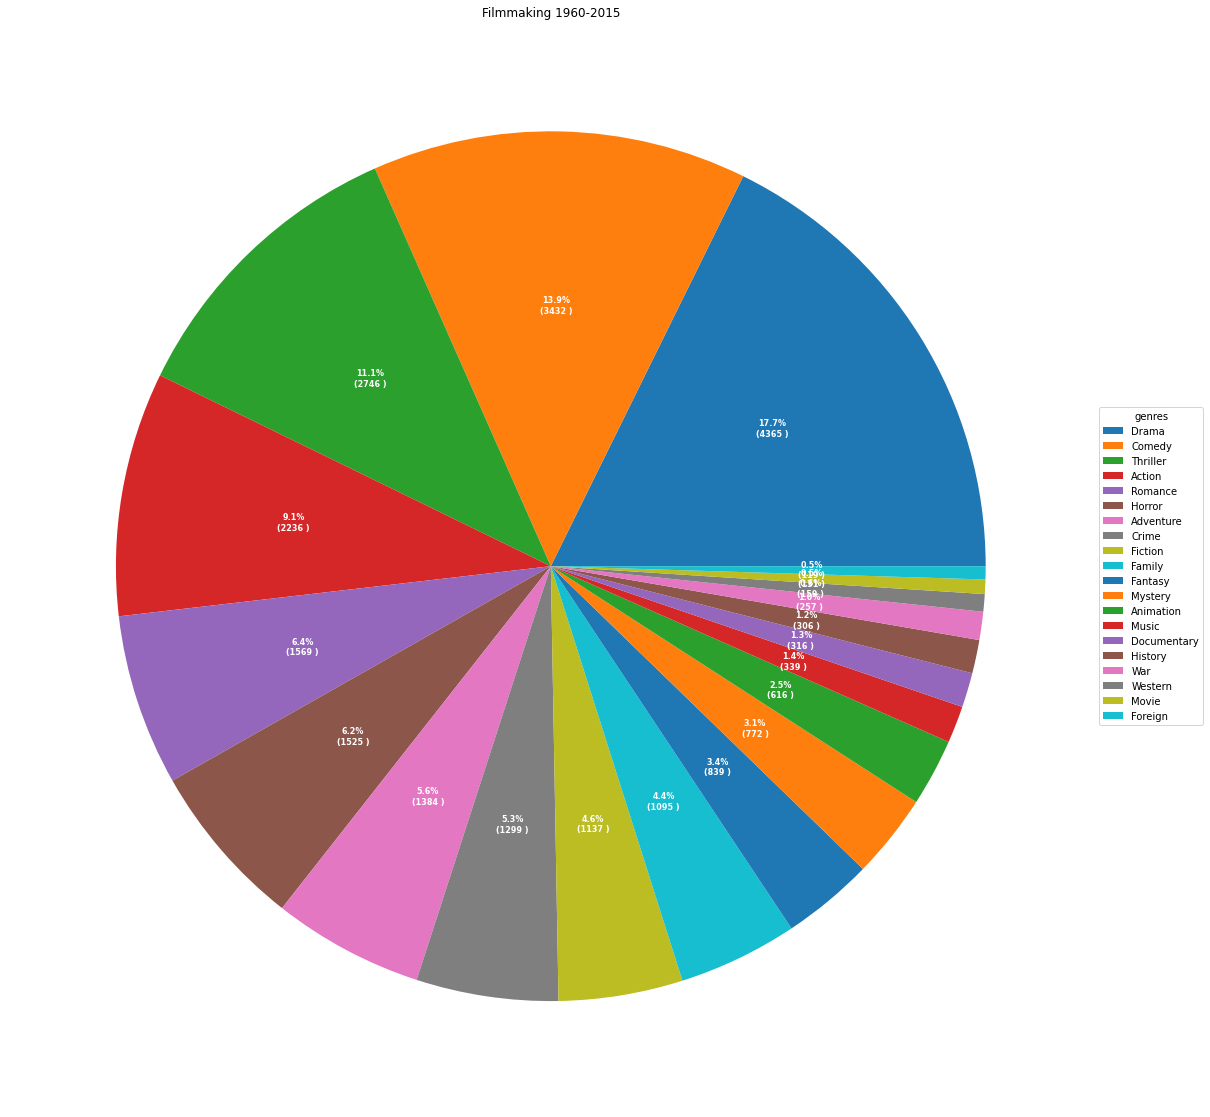

In [26]:

         


fig, ax = plt.subplots(figsize=(30, 20), subplot_kw=dict(aspect="equal"))

recipe = ["4365 Drama",
          "3433 Comedy",
          "2747 Thriller",
          "2236 Action",
         "1570  Romance",
         "1526  Horror",
         "1384  Adventure",
         "1300 Crime",
         "1137  Science Fiction",
         "1095  Family",
         "840  Fantasy",
         "773  Mystery",
         "617  Animation",
         "339  Music",
         "317  Documentary",
         "306  History",
         "258  War",
         "160  Western",
         "132  TV Movie",
         "120  Foreign"]

data = [float(x.split()[0]) for x in recipe]
ingredients = [x.split()[-1] for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="genres",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Filmmaking 1960-2015")

plt.show()

### reasoning for visualisations:

The graph shows the distribution of films, their numbers, and the percentage of each section
As the drama classification had the largest section, as it constituted 17.7% of all films over the course of 1960-2015.
Comedy was at number two, making up 13.9% of all films

## 12- In the years of the new millennium, what is the role of comedy in filmmaking?

In [27]:
Comedy=all_genres[all_genres.the_genres=='Comedy']
Comedy_20_15=Comedy.loc[Comedy.release_year>2000]
c_20_15=Comedy_20_15['the_genres'].value_counts()
c_20_15

Comedy    2022
Name: the_genres, dtype: int64

.
.
.
.
.
.
.


# Conclusions:
    
1-Regarding revenue: In 2009, AVATAR achieved an estimated revenue of 2781505847.
 Whereas in 2015, "Star Wars: The Force Awakens" achieved second place, if the movie Avatar scored a difference 713327622.


2-In 2010, The Warrior's Way culminated in massive material losses, incurring financial losses of 41,3912,431 
It is an estimated loss for every dollar spent from the budget, a profit of about 0.026 cents is obtained

3-The wonderful director christopher_nolan has a visionary eye and a charming touch in filmmaking. With a budget estimated at 150,000,000 in 2005,
he was able to achieve profits of 224218673, meaning that every dollar spent was recovered 249%.
    
    
4-In 2009, director James_cameron broke the profit barrier in the film industry, managing to set a record high in profits. 
For every dollar spent in the budget they are returned in profits of 1173% and that's really crazy,
Knowing that the lowest percentage of profits recorded
was for the 1994 film True Lies, where it was = 329% for every dollar spent,
" the profit rate is very high with the rest of the films of the 1990s."


5-The total comedy films that were shot from 1960 to 2015 are 3433 comedy producers,
and we notice a leap in the comedy industry in the world of cinema,
as from 1960 to 1999 only 1411 previous films were shot.
While in the new millennium "2000-2015", 2022 was filmed

## Limitations 
In the first step, while reading the data, I noticed a number of missing data.
Which may affect the sample, I did not find that the option to fill in the data with the average value is a correct option, as a large number of films will have the same value, which will affect the overall statistics, so I preferred to delete them so that the statistics are more correct.


## *References :
    
 1-   Use the matplotlib library for charts
  https://matplotlib.org/3.3.2/index.html

    